In [48]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import numpy as np

[[ 1.17272073  0.09156835]
 [-1.18889299 -0.09040821]
 [ 0.0796709  -1.12760177]
 [-0.10355485  1.12544675]]


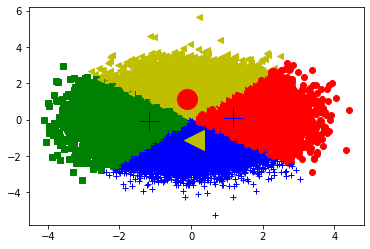

In [49]:
qm = np.load('test.npy')
pca = PCA(n_components=2)
# pca.fit(qm)
# print(pca.singular_values_)
# print(pca.explained_variance_ratio_)
pca_qm = pca.fit_transform(qm)
k = 4
clf1 = KMeans(n_clusters=k, random_state=0).fit(pca_qm)
label = clf1.labels_
cents = clf1.cluster_centers_
print(cents)
x, y = pca_qm[:,0], pca_qm[:,1]
color = ['or','sg','+b','<y','*m', '.k', 'pc']
for i in range(len(x)):
    plt.plot(x[i],y[i],color[label[i]])
for i in range(k):
    plt.plot(cents[i,0],cents[i,1], color[label[i]], markersize=20)

[[ 1.17272073  0.09156835]
 [-1.18889299 -0.09040821]
 [ 0.0796709  -1.12760177]
 [-0.10355485  1.12544675]]


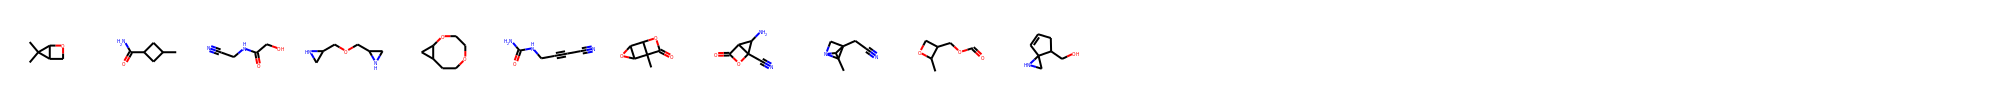

*****************************************************************************


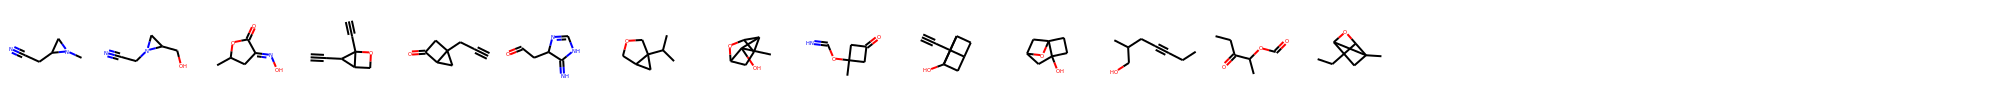

*****************************************************************************


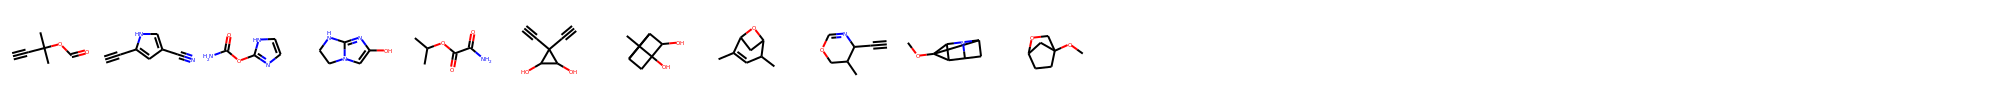

*****************************************************************************


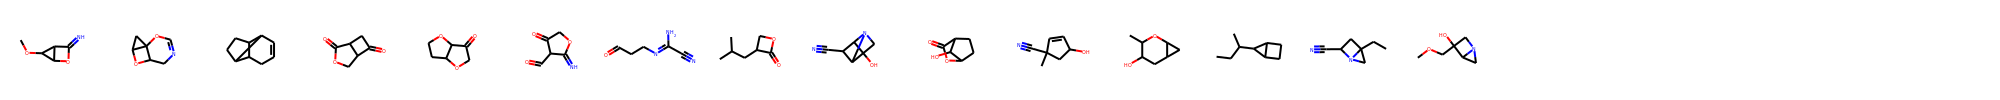

*****************************************************************************


In [50]:
from rdkit.Chem import Draw, AllChem
from rdkit import Chem
import pandas as pd

qm9 = pd.read_csv('../data/qm9.csv')
data = list(qm9['SMILES1'])
print(cents)
# x,y = cents[0]
# m,n = cents[1]
# A = n-y
# B = x-m
# C = m*y-x*n
# Y = np.linspace(-4, 4, 10)
# X = (B*Y+C)/(-A)
# mol = []
# for i in range(len(X)):
#     a,b = X[i], Y[i]
#     c = np.argmin(abs(pca_qm[:,0]-a)+abs(pca_qm[:,1]-b))
#     mol.append(c)
# mol = [Chem.MolFromSmiles(data[i]) for i in mol]
# display(Draw.MolsToGridImage(mol,molsPerRow=20, subImgSize=(100, 100)))

for cent in cents:
    a,b = cent
    c = np.where((abs(pca_qm[:,0]-a)<0.02) & (abs(pca_qm[:,1]-b)<0.02))
    mol = [Chem.MolFromSmiles(data[i]) for i in c[0]]
    display(Draw.MolsToGridImage(mol,molsPerRow=20, subImgSize=(100, 100)))
    print('*****************************************************************************')

# df = pd.DataFrame(label,columns=['label']) 

# for i in set(label):
#     a = df[df['label']==i].index.tolist()
#     a = [Chem.MolFromSmiles(data[i]) for i in a[-100:]]
#     display(Draw.MolsToGridImage(a,molsPerRow=15, subImgSize=(100, 100)))
#     print('*****************************************************************************')

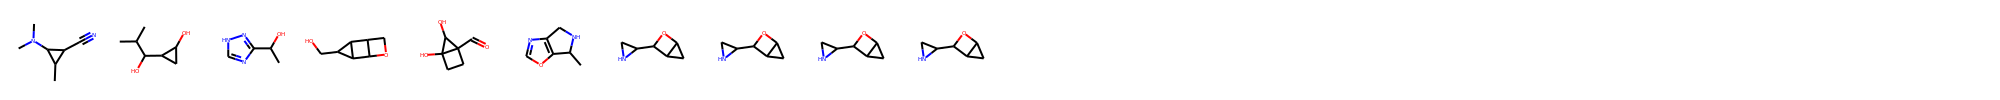

In [55]:
x,y = cents[0]
m,n = cents[1]
A = n-y
B = x-m
C = m*y-x*n
Y = np.linspace(-1, 1, 10)
X = (B*Y+C)/(-A)
mol = []
for i in range(len(X)):
    a,b = X[i], Y[i]
    c = np.argmin(abs(pca_qm[:,0]-a)+abs(pca_qm[:,1]-b))
    mol.append(c)
mol = [Chem.MolFromSmiles(data[i]) for i in mol]
display(Draw.MolsToGridImage(mol,molsPerRow=20, subImgSize=(100, 100)))

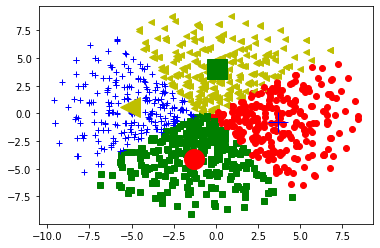

In [29]:
from sklearn.manifold import TSNE

qm = np.load('test.npy')
tsne_qm = TSNE(n_components=2).fit_transform(qm[:1000])
k = 4
clf2 = KMeans(n_clusters=k, random_state=0).fit(tsne_qm)
label = clf2.labels_
cents = clf2.cluster_centers_
x, y = tsne_qm[:,0], tsne_qm[:,1]
color = ['or','sg','+b','<y','*m', '.k', 'pc']
for i in range(1000):
    plt.plot(x[i],y[i],color[label[i]])
for i in range(k):
    plt.plot(cents[i,0],cents[i,1], color[label[i]], markersize=20)

[[ 3.6950352  -0.78481525]
 [-1.27478    -4.0976644 ]
 [-5.071743    0.60181695]
 [ 0.04700261  4.0099325 ]]


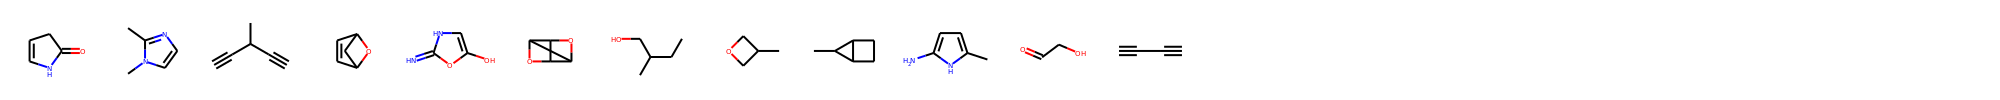

In [46]:
qm9 = pd.read_csv('../data/qm9.csv')
data = list(qm9['SMILES1'])

print(cents)
x,y = cents[1]
m,n = cents[3]
A = n-y
B = x-m
C = m*y-x*n
Y = np.linspace(-4, 4, 12)
X = (B*Y+C)/(-A)
mol = []
for i in range(len(X)):
    a,b = X[i], Y[i]
    c = np.argmin(abs(tsne_qm[:,0]-a)+abs(tsne_qm[:,1]-b))
    mol.append(c)
mol = [Chem.MolFromSmiles(data[i]) for i in mol]
display(Draw.MolsToGridImage(mol,molsPerRow=20, subImgSize=(100, 100)))

# df = pd.DataFrame(label,columns=['label']) 
# from IPython.display import Image

# label = clf2.labels_
# cents = clf2.cluster_centers_

# for cent in cents:
#     a,b = cent
#     c = np.where((abs(tsne_qm[:,0]-a)<0.5) & (abs(tsne_qm[:,1]-b)<0.5))
#     mol = [Chem.MolFromSmiles(data[i]) for i in c[0]]
#     display(Draw.MolsToGridImage(mol,molsPerRow=20, subImgSize=(100, 100)))
#     print('*****************************************************************************')

# for i in set(label):
#     a = df[df['label']==i].index.tolist()
#     a = [Chem.MolFromSmiles(data[i]) for i in a[-100:]]
#     display(Draw.MolsToGridImage(a,molsPerRow=15, subImgSize=(100, 100)))
#     print('*****************************************************************************')

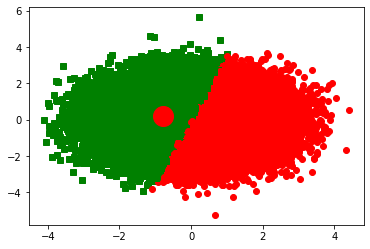

In [58]:
k = 2
clf3 = KMeans(n_clusters=k, random_state=0).fit(pca_qm)
label = clf3.labels_
cents = clf3.cluster_centers_
x, y = pca_qm[:,0], pca_qm[:,1]
color = ['or','sg','+b','<y','*m', '.k', 'pc']
for i in range(len(x)):
    plt.plot(x[i],y[i],color[label[i]])
for i in range(k):
    plt.plot(cents[i,0],cents[i,1], color[label[i]], markersize=20)

[[ 0.78083734 -0.22235978]
 [-0.79733722  0.22705846]]


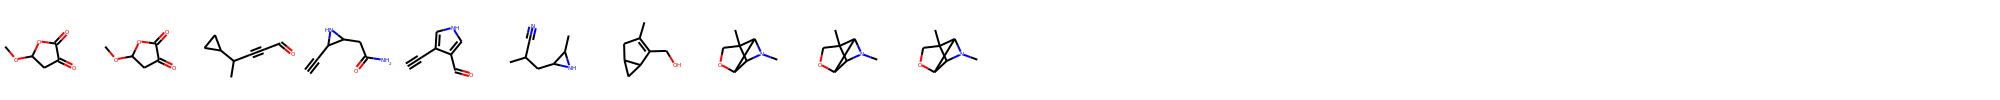

In [71]:
qm9 = pd.read_csv('../data/qm9.csv')
data = list(qm9['SMILES1'])

print(cents)
x,y = cents[0]
m,n = cents[1]
A = n-y
B = x-m
C = m*y-x*n
Y = np.linspace(-5, 5, 10)
X = (B*Y+C)/(-A)
mol = []
for i in range(len(X)):
    a,b = X[i], Y[i]
    c = np.argmin(abs(pca_qm[:,0]-a)+abs(pca_qm[:,1]-b))
    mol.append(c)
mol = [Chem.MolFromSmiles(data[i]) for i in mol]
display(Draw.MolsToGridImage(mol,molsPerRow=20, subImgSize=(100, 100)))

# df = pd.DataFrame(label,columns=['label']) 
# from IPython.display import Image

# for cent in cents:
#     a,b = cent
#     c = np.where((abs(tsne_qm[:,0]-a)<0.5) & (abs(tsne_qm[:,1]-b)<0.5))
#     mol = [Chem.MolFromSmiles(data[i]) for i in c[0]]
#     display(Draw.MolsToGridImage(mol,molsPerRow=20, subImgSize=(100, 100)))
#     print('*****************************************************************************')

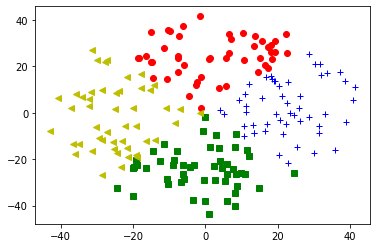

In [107]:
k = 2
# clf4 = KMeans(n_clusters=k, random_state=1).fit(tsne_qm)
label = clf4.labels_
cents = clf4.cluster_centers_
x, y = tsne_qm[:,0], tsne_qm[:,1]
color = ['or','sg','+b','<y','*m', '.k', 'pc']
for i in range(200):
    plt.plot(x[i],y[i],color[label[i]])
# for i in range(k):
#     plt.plot(cents[i,0],cents[i,1], color[label[i]], markersize=20)

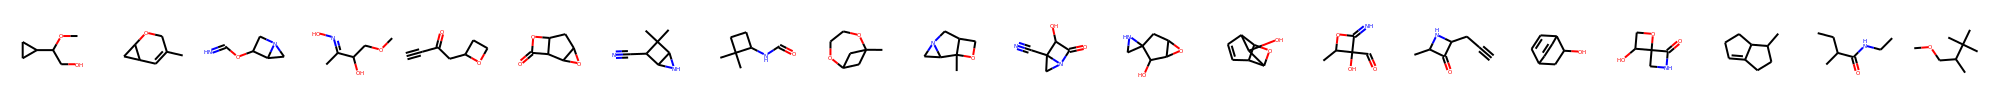

*****************************************************************************


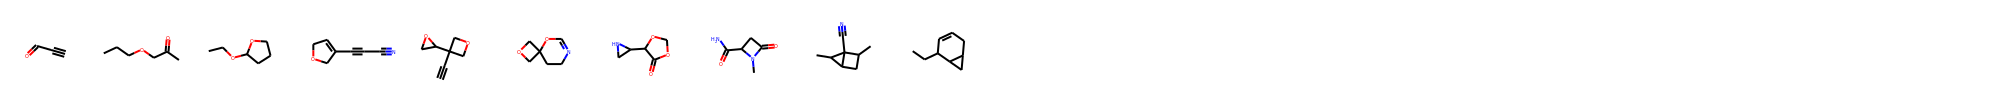

*****************************************************************************


In [11]:
from rdkit.Chem import Draw, AllChem
from rdkit import Chem
import pandas as pd

qm9 = pd.read_csv('../data/qm9.csv')
data = list(qm9['SMILES1'])

for cent in cents:
    a,b = cent
    c = np.where((abs(tsne_qm[:,0]-a)<0.4) & (abs(tsne_qm[:,1]-b)<0.4))
    mol = [Chem.MolFromSmiles(data[i]) for i in c[0]]
    display(Draw.MolsToGridImage(mol,molsPerRow=20, subImgSize=(100, 100)))
    print('*****************************************************************************')

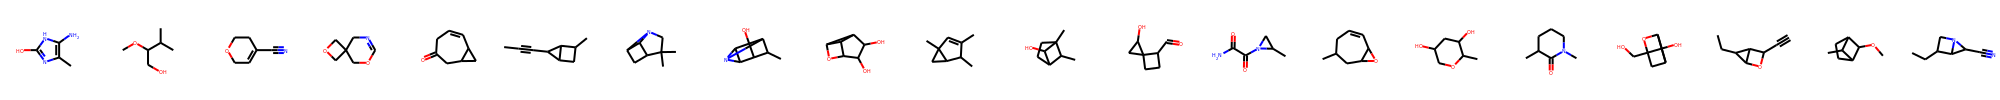

*****************************************************************************


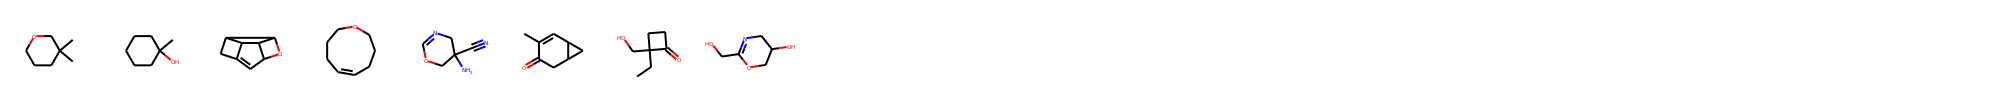

*****************************************************************************


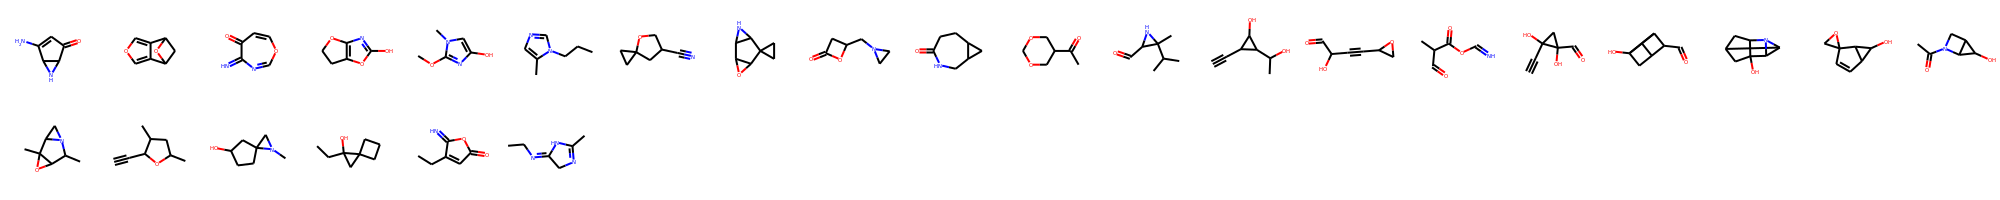

*****************************************************************************


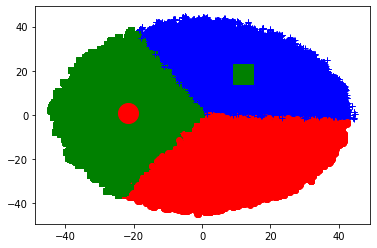

In [12]:
k = 3
clf4 = KMeans(n_clusters=k, random_state=2).fit(tsne_qm)
label = clf4.labels_
cents = clf4.cluster_centers_
x, y = tsne_qm[:,0], tsne_qm[:,1]
color = ['or','sg','+b','<y','*m', '.k', 'pc']
for i in range(len(x)):
    plt.plot(x[i],y[i],color[label[i]])
for i in range(k):
    plt.plot(cents[i,0],cents[i,1], color[label[i]], markersize=20)
    
for cent in cents:
    a,b = cent
    c = np.where((abs(tsne_qm[:,0]-a)<0.4) & (abs(tsne_qm[:,1]-b)<0.4))
    mol = [Chem.MolFromSmiles(data[i]) for i in c[0]]
    display(Draw.MolsToGridImage(mol,molsPerRow=20, subImgSize=(100, 100)))
    print('*****************************************************************************')

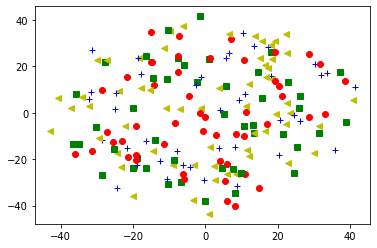

In [106]:
k = 4
# clf4 = KMeans(n_clusters=k, random_state=5).fit(tsne_qm)
# label = clf4.labels_
# cents = clf4.cluster_centers_
x, y = tsne_qm[:,0], tsne_qm[:,1]
color = ['or','sg','+b','<y','*m', '.k', 'pc']
for i in range(200):
    plt.plot(x[i],y[i],color[label[i]])
# for i in range(k):
#     plt.plot(cents[i,0],cents[i,1], color[label[i]], markersize=20)
    
# for cent in cents:
#     a,b = cent
#     c = np.where((abs(tsne_qm[:,0]-a)<0.5) & (abs(tsne_qm[:,1]-b)<0.5))
#     mol = [Chem.MolFromSmiles(data[i]) for i in c[0]]
#     display(Draw.MolsToGridImage(mol,molsPerRow=20, subImgSize=(100, 100)))
#     print('*****************************************************************************')

In [128]:
qm9 = pd.read_csv('../data/qm9.csv')
data = list(qm9['SMILES1'])

cents = np.array([[ -0.29179397,  23.860298  ],
       [  0.6294266 , -24.21649   ],
       [ 23.624022  ,   0.7037133 ],
       [-23.391617  ,  -0.5453895 ]])
cents

array([[ -0.29179397,  23.860298  ],
       [  0.6294266 , -24.21649   ],
       [ 23.624022  ,   0.7037133 ],
       [-23.391617  ,  -0.5453895 ]])

[-40.50294135 -32.13860194 -23.77426253 -15.40992312  -7.04558371
   1.31875571   9.68309512  18.04743453  26.41177394  34.77611335]


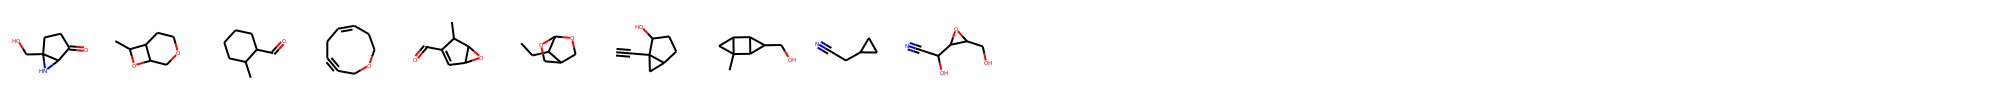

In [137]:
x,y = cents[2]
m,n = cents[3]
A = n-y
B = x-m
C = m*y-x*n
Y = np.linspace(-1, 1, 10)
X = (B*Y+C)/(-A)
print(X)
mol = []
for i in range(len(X)):
    a,b = X[i], Y[i]
    c = np.argmin(abs(tsne_qm[:,0]-a)+abs(tsne_qm[:,1]-b))
    mol.append(c)
mol = [Chem.MolFromSmiles(data[i]) for i in mol]
display(Draw.MolsToGridImage(mol,molsPerRow=20, subImgSize=(100, 100)))

[-40.50294135 -32.13860194 -23.77426253 -15.40992312  -7.04558371
   1.31875571   9.68309512  18.04743453  26.41177394  34.77611335]


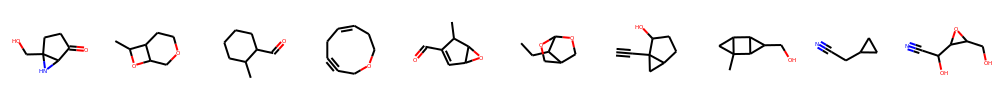

In [139]:
x,y = cents[2]
m,n = cents[3]
A = n-y
B = x-m
C = m*y-x*n
Y = np.linspace(-1, 1, 10)
X = (B*Y+C)/(-A)
print(X)
mol = []
for i in range(len(X)):
    a,b = X[i], Y[i]
    c = np.argmin(abs(tsne_qm[:,0]-a)+abs(tsne_qm[:,1]-b))
    mol.append(c)
mol = [Chem.MolFromSmiles(data[i]) for i in mol]
img = Draw.MolsToGridImage(mol,molsPerRow=10, subImgSize=(100, 100))
display(img)
img.save('trend.png')

[-23.82190285 -21.19275442 -18.56360599 -15.93445755 -13.30530912
 -10.67616068  -8.04701225  -5.41786381  -2.78871538  -0.15956694]


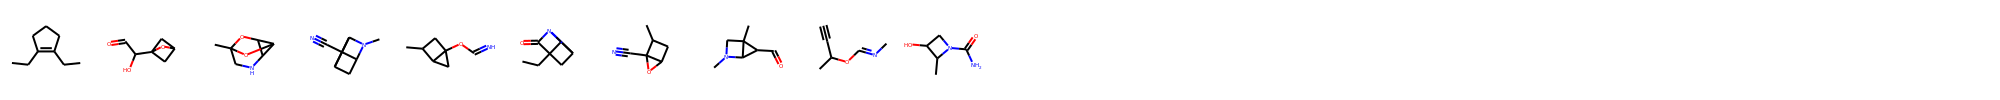

In [91]:
x,y = cents[3]
m,n = cents[0]
A = n-y
B = x-m
C = m*y-x*n
Y = np.linspace(-1, 24, 10)
X = (B*Y+C)/(-A)
print(X)
mol = []
for i in range(len(X)):
    a,b = X[i], Y[i]
    c = np.argmin(abs(tsne_qm[:,0]-a)+abs(tsne_qm[:,1]-b))
    mol.append(c)
mol = [Chem.MolFromSmiles(data[i]) for i in mol]
display(Draw.MolsToGridImage(mol,molsPerRow=20, subImgSize=(100, 100)))

[-0.09354083  2.57212085  5.23778254  7.90344423 10.56910591 13.2347676
 15.90042928 18.56609097 21.23175266 23.89741434]


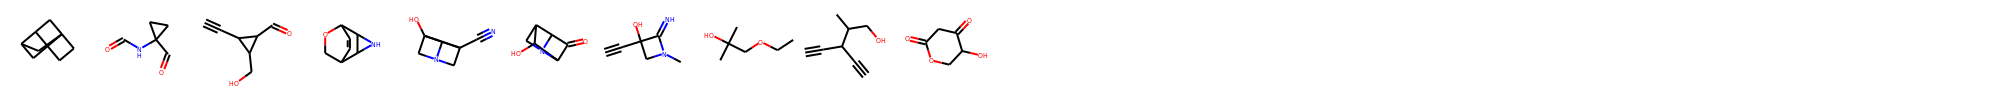

In [92]:
x,y = cents[1]
m,n = cents[2]
A = n-y
B = x-m
C = m*y-x*n
Y = np.linspace(-25, 1, 10)
X = (B*Y+C)/(-A)
print(X)
mol = []
for i in range(len(X)):
    a,b = X[i], Y[i]
    c = np.argmin(abs(tsne_qm[:,0]-a)+abs(tsne_qm[:,1]-b))
    mol.append(c)
mol = [Chem.MolFromSmiles(data[i]) for i in mol]
display(Draw.MolsToGridImage(mol,molsPerRow=20, subImgSize=(100, 100)))

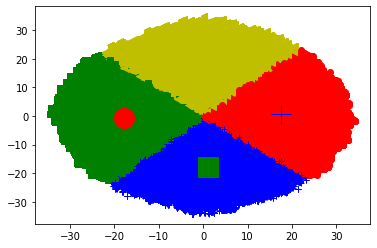

In [44]:
from sklearn.manifold import TSNE

zinc = np.load('zinc_test.npy')
tsne_zinc = TSNE(n_components=2).fit_transform(zinc)
k = 4
clf11 = KMeans(n_clusters=k, random_state=0).fit(tsne_zinc)
label = clf11.labels_
cents = clf11.cluster_centers_
x, y = tsne_zinc[:,0], tsne_zinc[:,1]
color = ['or','sg','+b','<y','*m', '.k', 'pc']
for i in range(len(x)):
    plt.plot(x[i],y[i],color[label[i]])
for i in range(k):
    plt.plot(cents[i,0],cents[i,1], color[label[i]], markersize=20)

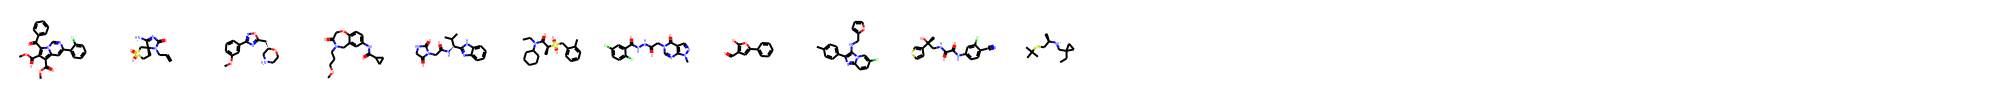

*****************************************************************************


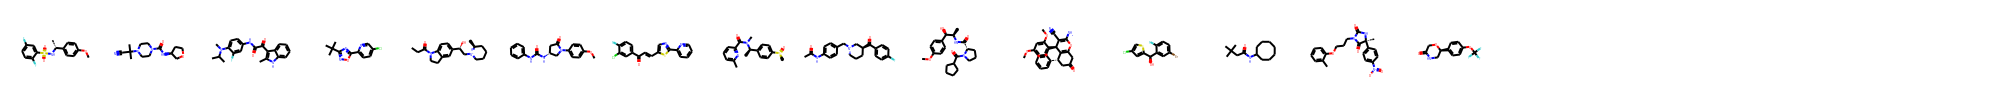

*****************************************************************************


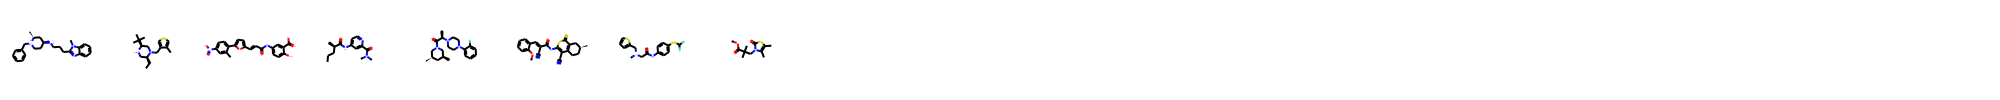

*****************************************************************************


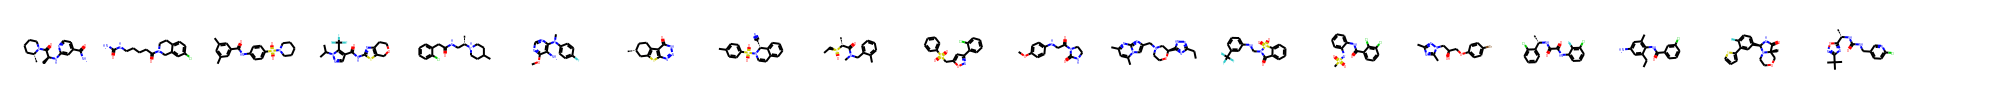

*****************************************************************************


In [47]:
zinc = pd.read_csv('../data/zinc250k.csv')
data = list(zinc['smiles'])

for cent in cents:
    a,b = cent
    c = np.where((abs(tsne_zinc[:,0]-a)<0.2) & (abs(tsne_zinc[:,1]-b)<0.2))
    mol = [Chem.MolFromSmiles(data[i]) for i in c[0]]
    display(Draw.MolsToGridImage(mol,molsPerRow=20, subImgSize=(100, 100)))
    print('*****************************************************************************')

In [96]:
zinc = pd.read_csv('../data/zinc250k.csv')
data = list(zinc['smiles'])

cents = np.array([[ 17.507889  ,   0.8127308 ],
       [-17.764507  ,  -0.5725578 ],
       [  0.9823816 , -17.85371   ],
       [ -0.65922827,  17.945826  ]])
cents

array([[ 17.507889  ,   0.8127308 ],
       [-17.764507  ,  -0.5725578 ],
       [  0.9823816 , -17.85371   ],
       [ -0.65922827,  17.945826  ]])

[ 0.98908982  0.80566734  0.62224487  0.43882239  0.25539992  0.07197745
 -0.11144503 -0.2948675  -0.47828998 -0.66171245]


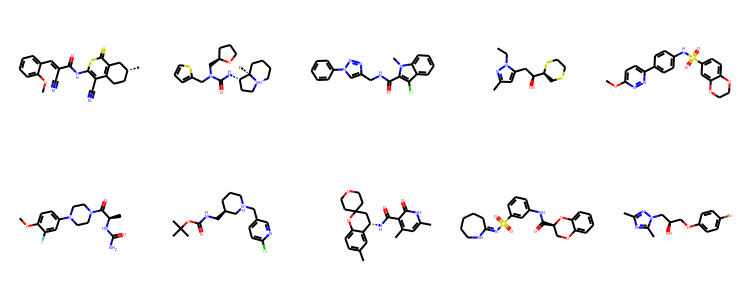

In [97]:
x,y = cents[2]
m,n = cents[3]
A = n-y
B = x-m
C = m*y-x*n
Y = np.linspace(-18, 18, 10)
X = (B*Y+C)/(-A)
print(X)
mol = []
import math
for i in range(len(X)):
    a,b = X[i], Y[i]
    c = np.argmin(abs(tsne_zinc[:,0]-a)+abs(tsne_zinc[:,1]-b))
    mol.append(c)
mol = [Chem.MolFromSmiles(data[i]) for i in mol]
display(Draw.MolsToGridImage(mol,molsPerRow=5, subImgSize=(150, 150)))

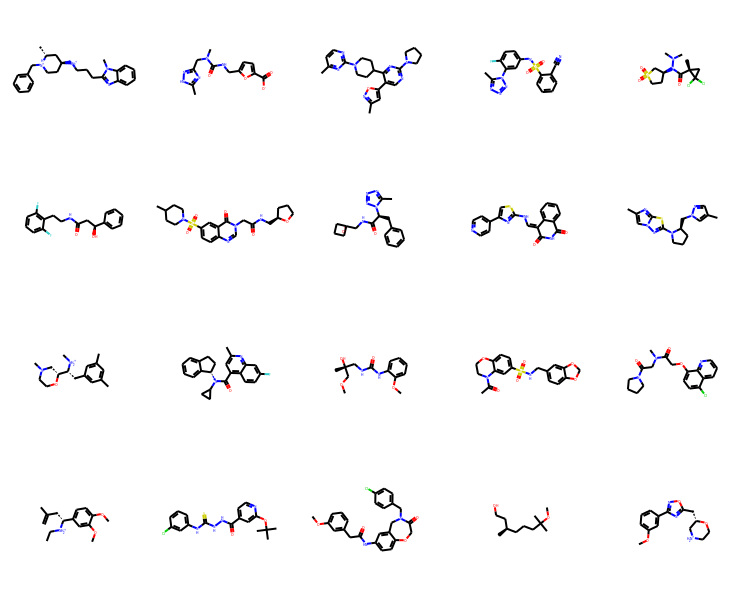

In [100]:
x,y = cents[0]
m,n = cents[2]
A = n-y
B = x-m
C = m*y-x*n
Y = np.linspace(-18, 1, 20)
X = (B*Y+C)/(-A)
mol = []
import math
for i in range(len(X)):
    a,b = X[i], Y[i]
    c = np.argmin(abs(tsne_zinc[:,0]-a)+abs(tsne_zinc[:,1]-b))
    mol.append(c)
mol = [Chem.MolFromSmiles(data[i]) for i in mol]
display(Draw.MolsToGridImage(mol,molsPerRow=5, subImgSize=(150, 150)))

In [ ]:
for cent in cents:
    a,b = cent
    c = np.where((abs(tsne_qm[:,0]-a)<0.5) & (abs(tsne_qm[:,1]-b)<0.5))
    mol = [Chem.MolFromSmiles(data[i]) for i in c[0]]
    display(Draw.MolsToGridImage(mol,molsPerRow=20, subImgSize=(100, 100)))
    print('*****************************************************************************')

In [ ]:
for i in set(label):
    a = df[df['label']==i].index.tolist()
    print(len(a))
    a = [Chem.MolFromSmiles(data[i]) for i in a[500:600]]
    display(Draw.MolsToGridImage(a,molsPerRow=15, subImgSize=(100, 100)))
    print('*****************************************************************************')

In [ ]:
for i in set(label):
    a = df[df['label']==i].index.tolist()
    print(len(a))
    a = [Chem.MolFromSmiles(data[i]) for i in a[200:300]]
    display(Draw.MolsToGridImage(a,molsPerRow=15, subImgSize=(100, 100)))
    print('*****************************************************************************')

In [ ]:
for i in set(label):
    a = df[df['label']==i].index.tolist()
    print(len(a))
    a = [Chem.MolFromSmiles(data[i]) for i in a[300:400]]
    display(Draw.MolsToGridImage(a,molsPerRow=15, subImgSize=(100, 100)))
    print('*****************************************************************************')